# Quick Guide to the `e_simulator` package

`e_simulator` is the python package to simulate the orbit of a relativistic charged particle flying in electromagnetic regions. All the calcutions in the library is in SI unit. Below is the quick guide for you to get started with the library and perform basic simulations.

## Installation

The package can be easily installed via pip.
```bash
pip install e_simulator
```
After the package is installed, import the package to your code.

In [1]:
import e_simulator as es

## Introduce built-in geometry

`e_simulator` haves some basic built-in class for you to work with geometry. which includes `Vector`, `Coordinate`, `Geometry`.
<br>
First, `Vector` allows us to do some basic calculations in easy ways.

In [2]:
# Define a vector
vector: es.Vector = es.Vector(x=5, y=10) # same as es.Vector(5, 10)
print(f'A vector is "{vector}".')

# Length of a vector
vector_length: float = vector.length()
vector_length_squared: float = vector.length_squared()
print(f'Length of "{vector}" is {vector_length}.')
print(f'Squared length of "{vector}" is {vector_length_squared}.')

# Angle create by a vector direction and x-axis (in radius)
vector_angle: float = vector.direction()
print(f'Angle of "{vector}" is {vector_angle} radius.')

# Vectors addition
added_vector: es.Vector = es.Vector(5, 6) + es.Vector(8, 4)
print(f'Added vector is "{added_vector}".')

# Vectors subtraction
subtracted_vector: es.Vector = es.Vector(5, 6) - es.Vector(1, 2)
print(f'Subtracted vector is "{subtracted_vector}".')

# A vector is multiplied by a number
multiplied_vector: es.Vector = es.Vector(2, 2) * 2.3
print(f'Multiplied vector is "{multiplied_vector}".')

# A vector is divided by a number
devided_vector: es.Vector = es.Vector(2, 2) / 2
print(f'Devided vector is "{devided_vector}".')

A vector is "Vector (5, 10)".
Length of "Vector (5, 10)" is 11.180339887498949.
Squared length of "Vector (5, 10)" is 125.
Angle of "Vector (5, 10)" is 1.1071487177940904 radius.
Added vector is "Vector (13, 10)".
Subtracted vector is "Vector (4, 4)".
Multiplied vector is "Vector (4.6, 4.6)".
Devided vector is "Vector (1.0, 1.0)".


A `Coordinate` object is basically a position vector. 

In [3]:
# Define a coordinate
coordinate: es.Coordinate = es.Coordinate(x=5, y=10) # same as es.Coordinate(5, 10)
print(f'A coordinate is "{coordinate}".')

A coordinate is "Coordinate (5, 10)".


A `Geometry` is a 2D area. There are 2 types of `Geometry`, they are `PolygonGeometry` and `CircleGeometry`.

In [4]:
# Define a polygon geometry
polygon_1: es.Geometry = es.PolygonGeometry(
    # This create a triangle
    coordinates = [es.Coordinate(3,4), es.Coordinate(10, 12), es.Coordinate(5,6)]
)
print(f'First polygon is "{polygon_1}"')

# Or you can define it in a easier way
polygon_2: es.Geometry = es.PolygonGeometry.simple_construct(
    tuples = [(3,4), (10,12), (5,6)]
)
print(f'Second polygon is "{polygon_2}"')

First polygon is "Geometry type <GeometryType.POLYGON>"
Second polygon is "Geometry type <GeometryType.POLYGON>"


In [5]:
import math

# Define a circle geometry
circle_1: es.Geometry = es.CircleGeometry(
    center = es.Coordinate(5, 5),
    radius = 4.2,

    # Optional, use when the circle is not a full circle
    # The angle is defined anticlockwise to x-axis in radius
    start_angle = math.pi/3,

    # Optional, use when the circle is not a full circle
    # The central angle of the "pie slice"
    central_angle = math.pi
)
print(f'First circle is "{circle_1}"')

# Or you can define it in a easier way
circle_2: es.Geometry = es.CircleGeometry.simple_construct(
    center = (5, 5),
    radius = 4.2,
    start_angle = math.pi/3,
    central_angle = math.pi
)
print(f'Second circle is "{circle_2}"')

First circle is "Geometry type <GeometryType.CIRCLE>"
Second circle is "Geometry type <GeometryType.CIRCLE>"


## Set project and project's system

### Define a project

To start, you need to construct a project via `Project` class.

In [6]:
# Define a color
bg_color: es.Color = es.Color(red=100, green=100, blue=100)
# or
bg_color: es.Color = es.Color.from_hex('#32a2a8')

# Define a project
project: es.Project = es.Project(
    # Optional
    # The name will be used in visual representation
    name = 'My first project',

    # Optional
    # The bg_color will be used in visual representation
    bg_color = bg_color
)
print(f'A project is "{project}"')

A project is "ESProject (My first project)"


### Set project's boundary

The boundary is required as the simulation will stop if the particle is out of the boundary.<br>
The boudary of a project is defined via `Geometry`

In [7]:
# Define a boundary
boundary: es.Geometry = es.PolygonGeometry.simple_construct(
    tuples=[(0,0), (0,100), (200,100), (200, 0)] # a rectangle
)

# Set the boundary for the project
project.set_bounds(bounds=boundary)

### Set project's particle

Each project has only one particle.

In [8]:
# Define a particle
particle: es.Particle = es.Particle(
    mass = 9.1e-31, # electron mass
    charge = -1.6e-19, # electron charge

    # The position of the particle when the simulation starts
    init_position = es.Coordinate(10, 60),

    # Optional, default is "es.Vector(0, 0)"
    # The velocity of the particle when the simulation starts 
    init_velocity = es.Vector(1, 0),

    # Optional, default is "0"
    # The drag force is calculated as "drag_coefficient * v^2"
    drag_coefficient = 0,

    # Optional
    # The name will be used in visual representation
    name = 'electron',

    # Optional
    # The color will be used in visual representation
    color = es.Color(0, 0, 255) # blue color
)
print(f'A particle is "{particle}"')

# Set the particle for the project
project.set_particle(particle=particle)

A particle is "Particle (electron)"


### Set project's electromagnetic regions

An electromagnetic region have 2 most important parameters, they are `geometry: es.Geometry` and `em_field: es.EMField`.<br>
The `geometry` parameter is used to define the area of the electromagnetic field.

In [9]:
# Define a region's geometry
region_1_geometry: es.Geometry = es.CircleGeometry.simple_construct(
    center = (50, 50),
    radius = 20,
    start_angle = 0,
    central_angle = math.pi
)
print(f'A region geometry is "{region_1_geometry}"')

# Or
region_1_geometry: es.Geometry = es.PolygonGeometry.simple_construct(
    tuples = [(0,30), (50,30), (50,70), (0,70)]
) 
print(f'Or it also can be "{region_1_geometry}"')

A region geometry is "Geometry type <GeometryType.CIRCLE>"
Or it also can be "Geometry type <GeometryType.POLYGON>"


The `em_field` parameter is an object of `EMField` class and it has information about strength and direction of an electromagnetic field.<br>
There are 2 types of `EMField`, first type is static field `StaticEMField` and second type is varying field `VaryingEMField`.

In [10]:
# Define a static region's field
region_1_field: es.EMField = es.StaticEMField(
    # Optional, default is "es.Vector(0, 0)"
    electric = es.Vector(4, 5),

    
    # Optional, default is "0"
    # The magnetic field in this package is always perpendicular to the coordinate plane. 
    # A positive magnetic field corresponds to a field directed into the plane, 
    # while a negative magnetic field corresponds to a field directed out of the plane.
    # Below magnetic field is directed into the plane.
    magnetic = 1 
)
print(f'A static field is "{region_1_field}"')

# Define a varying region's field
region_1_field: es.EMField = es.VaryingEMField(
    # Optional, default is "lambda t: es.Vector(0, 0)"
    # The get_electric parameter is a function of time (t) and return a Vector
    get_electric = lambda t: es.Vector(-t*5e-10, 0),

    # Optional, default is "lambda t: 0"
    # The get_magnetic parameter is a function of time (t) and return a number
    get_magnetic = lambda t: 0
)
print(f'A varying field is "{region_1_field}"')


A static field is "EMField type <EMFieldType.STATIC>"
A varying field is "EMField type <EMFieldType.VARYING>"


Now, it's time to define a electromagnetic region via `EMRegion`.

In [11]:
# Define an electromagenetic region
em_region_1: es.EMRegion = es.EMRegion(
    # The em_field parameter has information about 
    # strength and direction of the field
    em_field = region_1_field,

    # The geometry defines the area of the field
    geometry = region_1_geometry,

    # Optional
    # The name will be used in visual representation
    name = 'Region One',

    # Optional
    # The color will be used in visual representation
    color = es.Color(0, 255, 0) # green color
)
print(f'A region is "{em_region_1}"')

A region is "EMRegion (Region One)"


Next, we will create another `EMRegion` and store our 2 regions in a list. After that, we can set the project's regions.

In [12]:
# Define another electromagnetic region
em_region_2: es.EMRegion = es.EMRegion(
    em_field = es.StaticEMField(magnetic=2e-11),
    geometry = es.CircleGeometry.simple_construct(
        center=(50, 50), radius=20, start_angle=math.pi*1.5, central_angle=math.pi
    ),
    name = 'Region Two'
)

# Store regions in a list
em_regions: list[es.EMRegion] = [em_region_1, em_region_2]

# Set project's regions
project.set_em_regions(em_regions=em_regions)

### Visualize project's system

You also can view your current project's system by drawing it with `matplotlib` and our `es.Visualizer`.

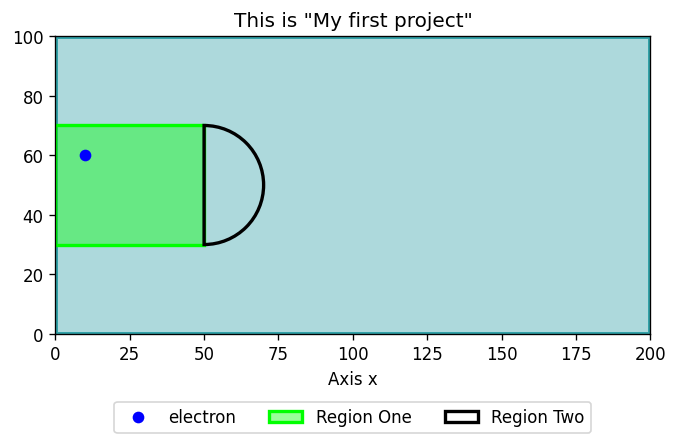

In [13]:
import matplotlib.pyplot as plt

# Create Visualizer instance
visualizer: es.Visualizer = es.Visualizer(project=project)

# Init matplotlib
fig, ax = plt.subplots()

# Use visualizer to draw the system
visualizer.plot_system(
    # visualizer use plt.Axes to draw
    axes = ax,

    # Optional
    # Same as plt.xlim()
    x_limit = (0, 200),

    # Optional
    # Same as plt.ylim()
    y_limit = (0, 100),

    # Optional
    # Use {} to add the project's name
    title = 'This is "{}"',

    # Optional
    # This ratio is the ratio between the length of 
    # 1 unit on the y-axis and 1 unit on the x-axis
    # This is used in plt.Axes.set_aspect()
    aspect_ratio = 1,

    # Optional, default is "2"
    # legend_cols must be integer
    legend_cols = 3,
    
    # Optional, default is "2"
    # bounds_width is used to define the thickness of the boundary
    bounds_width = 3,

    # Optional, default is "1"
    # bounds_width is used to define the thickness of the regions
    region_width = 2
)

# You also can do anything before or after visualizer.plot_system()
# like set_dpi, set_xlabel, resize, ...
fig.set_dpi(120)
ax.set_xlabel('Axis x')

# Show the image
plt.show()

### Save and import your project's system

We use `joblib` package to export project's system.

In [14]:
# Export project's system
project.export_system_joblib(
    path = 'project_system.joblib'
)

We can import the system from a joblib file to a new project.

In [15]:
# Define a new project
new_project = es.Project()

# Import system from file
new_project.import_system_joblib(
    path = 'project_system.joblib'
)
print(f'The new project is "{new_project}"')

The new project is "ESProject (My first project)"


## Simulate and visualize simulation

When all required system is setted, it's time for simulation.<br>
Our simulation employs the Runge-Kutta 4 method to integrate the orbit of the particle, <br>
ensuring that the calculations remain precise and reliable throughout the simulation.

### Simulate

To start simulating, use `Project.simulate` as below.

In [16]:
# Start simulation
project.simulate(
    # Optional
    # The simulation will be stopped if the particle reaches this distance.
    max_s = 100,

    # Optional
    # The simulation will be stopped if time passes max_t
    max_t = 10,

    # Optional, defalut is "0.05"
    # The simulation will use relativistic calculation 
    # if the particle's speed equals or is greater than this ratio of light speed
    start_relativistic_ratio = 0.1,

    # Optional, default is "lambda v: 1/(v*1e2)"
    # The faster the particle moves, the smaller delta_t should be
    # This is the function of speed (v) and returns a number that is delta_t
    delta_t_func = lambda v: 1/(v*1e3),

    # Optional
    # Sometimes, we dont need to store all step data
    # If you use this parameter, the data is only saved each time 
    # the particle reaches this distance.
    save_per_distance = 0.01
)

### View simulated data

To receive the simulated data, use `Project.simulate_data`

In [17]:
# Get the simulated data
data = project.simulate_data

# Simulated data is stored as a list of es.SimulateDataItem
last_data_item: es.SimulateDataItem = data[-1]

# Each data item has time, position, velocity, and kinetic energy of the particle
print(f'Time of this step is "{last_data_item.time}"')
print(f'Position of this particle in this step is "{last_data_item.position}"')
print(f'Velocity of this particle in this step is "{last_data_item.velocity}"')
print(f'Kinetic energy of this particle in this step is "{last_data_item.kinetic}"')
print(f'You also can view kinetic energy in eV, which is "{last_data_item.kinetic_in_ev}"')

Time of this step is "2.0882824596888034"
Position of this particle in this step is "Vector (91.34341678588699, 19.855247858764457)"
Velocity of this particle in this step is "Vector (49.70551093389559, -68.7947820201816)"
Kinetic energy of this particle in this step is "3.277528731933782e-27"
You also can view kinetic energy in eV, which is "2.0456725500923748e-08"


You can convert your data into `pandas.DataFrame` with `Project.simulate_data_to_df()`.

In [18]:
# Convert simulated data to pandas.DataFrame
simulate_df = project.simulate_data_to_df()

# Save your data
simulate_df.to_csv('simulate_data.csv')

simulate_df

,Time,Distance,Position x,Position y,Velocity x,Velocity y,Kinetic,Kinetic (eV)
0,0.000000,0.000000,10.000000,60.000000,1.000000,0.000000,4.550000e-31,2.839887e-12
1,0.009988,0.010002,10.010002,60.000000,1.004385,0.000000,4.589988e-31,2.864845e-12
2,0.019893,0.020008,10.020008,60.000000,1.017395,0.000000,4.709672e-31,2.939546e-12
3,0.029637,0.030019,10.030019,60.000000,1.038610,0.000000,4.908131e-31,3.063414e-12
4,0.039153,0.040032,10.040032,60.000000,1.067383,0.000000,5.183840e-31,3.235499e-12
...,...,...,...,...,...,...,...,...
9996,2.087811,99.960221,91.319991,19.887670,49.705511,-68.794782,3.277529e-27,2.045673e-08
9997,2.087929,99.970221,91.325847,19.879565,49.705511,-68.794782,3.277529e-27,2.045673e-08
9998,2.088047,99.980221,91.331704,19.871459,49.705511,-68.794782,3.277529e-27,2.045673e-08
9999,2.088165,99.990221,91.337560,19.863354,49.705511,-68.794782,3.277529e-27,2.045673e-08


We also have `Project.import_simulate_data_csv` for you to import this data back.


In [19]:
# Import simulate data
new_project.import_simulate_data_csv('simulate_data.csv')

print(f'After imported, last item of new_project data is "{new_project.simulate_data[-1]}"')

After imported, last item of new_project data is "SimulateDataItem (t=2.0882824596888034)"


### Visualize simulated data

Same as `plot_system`, we have similar `plot_simulation` to show static simulation image.

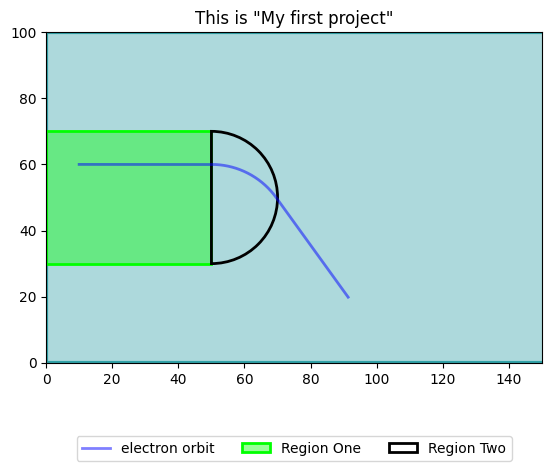

In [22]:
# Init matplotlib
fig, ax = plt.subplots()

# Use the visualizer to draw the system and the particle's orbit
visualizer.plot_simulation(
    # visualizer use plt.Axes to draw
    axes = ax,

    # Optional
    # Same as plt.xlim()
    x_limit = (0, 150),

    # Optional
    # Same as plt.ylim()
    y_limit = (0, 100),

    # Optional
    # Use {} to add the project's name
    title = 'This is "{}"',

    # Optional
    # This ratio is the ratio between the length of 
    # 1 unit on the y-axis and 1 unit on the x-axis
    # This is used in plt.Axes.set_aspect()
    aspect_ratio = 1,

    # Optional, default is "2"
    # legend_cols must be integer
    legend_cols = 3,
    
    # Optional, default is "2"
    # bounds_width is used to define the thickness of the boundary
    bounds_width = 3,

    # Optional, default is "1"
    # bounds_width is used to define the thickness of the regions
    region_width = 2,

    # Optional, default is "1"
    # orbit_width is used to define the thickness of the orbit line
    orbit_width = 2
)

# You also can do anything before or after visualizer.plot_system()
# like set_dpi, set_xlabel, resize, ...
fig.set_dpi(100)

# Show the image
plt.show()

We also provide animation visualization via `gif` file.

In [24]:
# First, create an animation object
animation = visualizer.animation(
    # Optional, default is "1"
    # This will slow the movement of the particle
    # If you want it to move faster, use "1/<number>"
    slower_times = 2,

    # Optional, default is "10"
    # fps stands for frames per second
    fps = 12,

    # Optional
    # Same as plt.xlim()
    x_limit = (0, 200),

    # Optional
    # Same as plt.ylim()
    y_limit = (0, 100),

    # Optional
    # Use {} to add the project's name
    title = 'This is "{}"',

    # Optional
    # This ratio is the ratio between the length of 
    # 1 unit on the y-axis and 1 unit on the x-axis
    # This is used in plt.Axes.set_aspect()
    aspect_ratio = 1,

    # Optional, default is "2"
    # legend_cols must be integer
    legend_cols = 3,
    
    # Optional, default is "2"
    # bounds_width is used to define the thickness of the boundary
    bounds_width = 3,

    # Optional, default is "1"
    # bounds_width is used to define the thickness of the regions
    region_width = 2,

    # Optional, default is "1"
    # orbit_width is used to define the thickness of the orbit line
    orbit_width = 2,

    # Optional, default is "5"
    # image_width is the width of the gif image in inches
    image_width = 6
)

# Export gif file
animation.export_gif('simulation.gif')

## Examples

Open folder `guide/examples` to view our examples.